In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
%matplotlib inline

In [2]:
def generate_circle(x_size, y_size, x_origin, y_origin, radius):
	image = np.zeros((y_size, x_size), dtype=bool)
	'''
	for y in range(y_size):
		for x in range(x_size):
			if((y-y_origin)**2 + (x-x_origin)**2 <= radius**2):
				image[y, x] = True
	'''
	ys, xs = np.meshgrid(np.arange(y_size), np.arange(x_size), indexing='ij')
	image = (ys - y_origin)**2 + (xs - x_origin)**2 <= radius**2
	return image

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	image = np.zeros((y_size, x_size), dtype=bool)
	image[y_b:y_b+height, x_b:x_b+width] = True
	return image

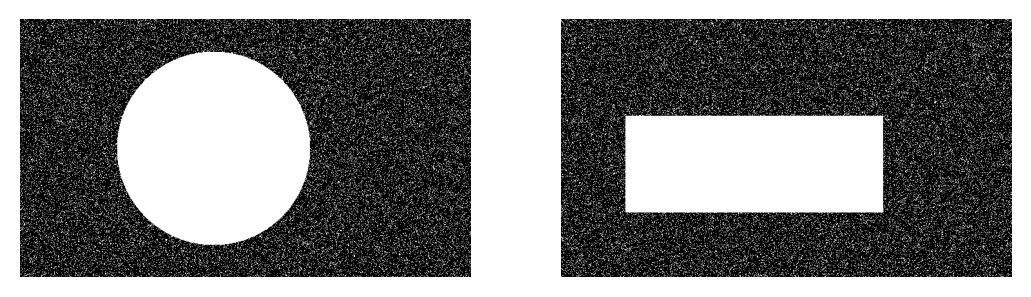

In [3]:
x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_circle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

# Dodanie szumu do wizualizacji następnych funkcji
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
def erosion(image, se): #se - rozmiar maski
	output = np.zeros_like(image)

	nrows, ncols = image.shape
	filter_y, filter_x = se.shape
	fy, fx = filter_y//2, filter_x//2

	padded_image = np.pad(image, ((fy, fy), (fx, fx)), mode='constant', constant_values=True)

	for row in range(fy, nrows-fy):
		for col in range(fx, ncols-fx):
			region = padded_image[row:row+2*fy+1, col:col+2*fx+1] #row-fy+fy
			value = np.min(region*se)
			output[row, col] = value

	return output


def dilation(image, se):
	output = np.zeros_like(image)

	nrows, ncols = image.shape
	filter_y, filter_x = se.shape
	fy, fx = filter_y//2, filter_x//2

	padded_image = np.pad(image, ((fy, fy), (fx, fx)), mode='constant', constant_values=False)

	for row in range(fy, nrows-fy):
		for col in range(fx, ncols-fx):
			region = padded_image[row:row+2*fy+1, col:col+2*fx+1] #row-fy+fy
			value = np.max(region*se)
			output[row, col] = value

	return output


def opening(image, se):
	eroded_image = erosion(image, se)
	opened_image = dilation(eroded_image, se)
	return opened_image


def closing(image, se):
	dilated_image = dilation(image, se)
	closed_image = erosion(dilated_image, se)
	return closed_image

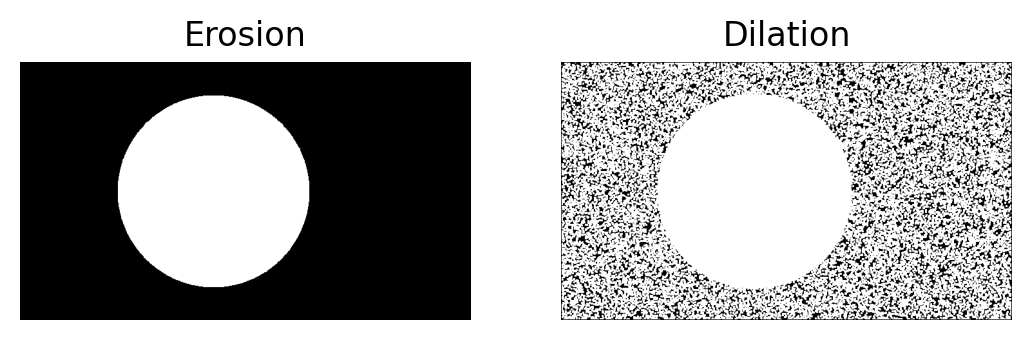

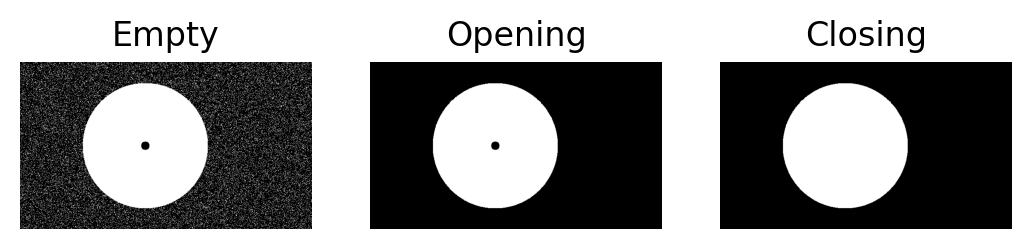

In [5]:
eroded_circle = erosion(circle, np.ones((3, 3)))
dilated_circle = dilation(circle, np.ones((3, 3)))

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

inner_circle = generate_circle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle))
opened_circle = opening(empty_circle, np.ones((3, 3)))
closed_opened_circle = closing(opened_circle, np.ones((21, 21)))
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

In [6]:
small_circle = generate_circle(64, 64, 32, 32, 8)

In [7]:
outer_edge = np.logical_xor(dilation(small_circle, np.ones((3, 3))), small_circle)
inner_edge = np.logical_xor(small_circle, erosion(small_circle, np.ones((3, 3))))

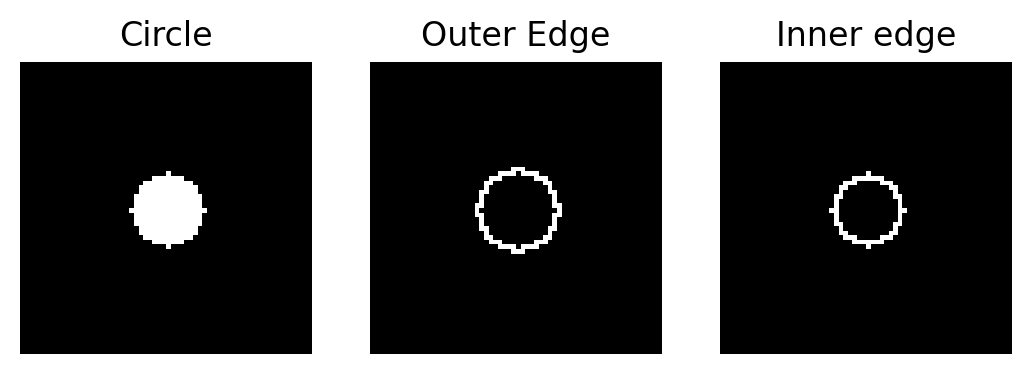

In [8]:
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(small_circle, cmap='gray')
plt.axis('off')
plt.title("Circle")
plt.subplot(1, 3, 2)
plt.imshow(outer_edge, cmap='gray')
plt.axis('off')
plt.title("Outer Edge")
plt.subplot(1, 3, 3)
plt.imshow(inner_edge, cmap='gray')
plt.axis('off')
plt.title("Inner edge")
plt.show()